In [1]:
#pip install ezdxf

In [2]:
from PIL import Image
import numpy as np

from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal

import math        
import ezdxf
from shapely.geometry import Polygon

from qiskit_metal import draw, Dict
from qiskit_metal.qlibrary.core.base import QComponent
import numpy as np

In [3]:
design = metal.designs.DesignPlanar()

design.overwrite_enabled = True
design.chips.main
design.chips.main.size.size_x = '30mm'
design.chips.main.size.size_y = '30mm'

In [4]:
dir(QComponent)

['TOOLTIP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__i_am_component__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_to_design',
 '_check_pin_inputs',
 '_delete_evaluation',
 '_gather_all_children_metadata',
 '_gather_all_children_options',
 '_get_specific_table_values_from_renderers',
 '_get_table_values_from_renderers',
 '_get_unique_class_name',
 '_is_name_used',
 '_register_class_with_design',
 'add_dependency',
 'add_pin',
 'add_qgeometry',
 'class_name',
 'component_metadata',
 'connect_components_already_in_design',
 'default_options',
 'delete',
 'design',
 'get_pin',
 'get_template_options',
 'id',
 'logger',
 'make',
 'name',
 'options',
 'parse_options',
 'parse_value',
 'pin_names',
 

In [5]:
class MyQComponent(QComponent):
    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(width='500um',
                           height='500um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""
    

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""
    def dxf_conf(filename):
        doc = ezdxf.readfile(filename)  # Read the DXF file
        msp = doc.modelspace()  # Get the modelspace of the document
        for entity in msp:
            if entity.dxftype() == 'LWPOLYLINE':
                vertices = [(vertex[0], vertex[1]) for vertex in entity.get_points()]
            elif entity.dxftype() == 'POLYLINE':
                vertices = [(point[0], point[1]) for point in entity.points()]
            print(vertices) #you might want to check and add vertices manually to draw.polygon
            return vertices
    filename2 = "star4.dxf"
    vertices2 = dxf_conf(filename2)
    
    filename3 = "ll3.dxf"
    vertices3 = dxf_conf(filename3)
    
    filename4 = "a1.dxf"
    vertices4 = dxf_conf(filename4)
    
    filename5 = "a2.dxf"
    vertices5 = dxf_conf(filename5)
    
        
    # Default drawing options
    default_options = Dict(plate1_width='110.25um',
                           plate1_height='800um',
                           plate1_pos_x='0',
                           plate1_pos_y='0',
                           squid_gap='200um',
                           segment_a_length='200um',
                           segment_a_width='20um',
                           JJ_gap='10um',
                           segment_b_length='100um',
                           segment_b_width='20um',
                           segment_c_width='20um',
                           segment_d_length='250um',
                           segment_d_width='40um',
                           segment_e_length='250um',
                           segment_e_width='40um',
                           segment_f_width='20um',
                           plate2_width='120.25um',
                           plate2_height='800um',)
    
    """
                    |                                                                    |
                    |                                                                    |
                    |                |-----seg a-----|JJ|-- seg b-------|                |
                  plate1             |                                  |              plate 2
                    |                |                                  |                |
                    |-----seg e--- seg f                              seg c ---seg d-----|
                    |                |                                  |                |
                    |                |                                  |                |
                    |                |--seg a lower--|JJ|--seg b lower--|                |
                    |                                                                    |
                    |                                                                    |
    """    
    
    def make_squid(self):
        #Convert self.options into QGeometry.

        p = self.parse_options()  # Parse the string options into numbers

        # draw the lower pad as a rectangle
        plate1 = draw.rectangle(p.plate1_width, p.plate1_height, p.plate1_pos_x,
                                p.plate1_pos_y)

        #segment_c
        segment_f = draw.rectangle(
            p.segment_f_width,
            p.squid_gap + p.segment_a_width + p.segment_b_width,
            0.5 * (p.plate1_width + p.segment_f_width)+ p.segment_e_length, p.plate1_pos_y)

        #segment_d
        segment_e = draw.rectangle(
            p.segment_e_length, p.segment_e_width,
            0.5 * (p.plate1_width + p.segment_e_length) , p.plate1_pos_y)



        segment_a = draw.rectangle(p.segment_a_length, p.segment_a_width,
                                   0.5 * (p.plate1_width + p.segment_a_length)+ p.segment_f_width+ p.segment_e_length,
                                   0.5 * (p.squid_gap + p.segment_a_width))

        segment_a_lower = draw.translate(
            segment_a, 0.0, -1.0 * (p.squid_gap + p.segment_a_width))

        segment_b = draw.rectangle(
            p.segment_b_length, p.segment_b_width,
            0.5 * (p.plate1_width + p.segment_b_length) + p.JJ_gap +
            p.segment_a_length+ p.segment_f_width+ p.segment_e_length, 0.5 * (p.squid_gap + p.segment_b_width))

        segment_b_lower = draw.translate(
            segment_b, 0.0, -1.0 * (p.squid_gap + p.segment_b_width))

        segment_c = draw.rectangle(
            p.segment_c_width,
            p.squid_gap + p.segment_a_width + p.segment_b_width,
            0.5 * (p.plate1_width + p.segment_c_width) + p.segment_a_length +
            p.segment_b_length + p.JJ_gap+ p.segment_f_width+ p.segment_e_length, p.plate1_pos_y)

        segment_d = draw.rectangle(
            p.segment_d_length, p.segment_d_width,
            0.5 * (p.plate1_width + p.segment_d_length) + p.segment_a_length +
            p.segment_b_length + p.JJ_gap + p.segment_c_width+ p.segment_f_width+ p.segment_e_length, p.plate1_pos_y)


        plate2 = draw.rectangle(
            p.plate2_width, p.plate2_height, 0.5 *
            (p.plate1_width + p.plate2_width) + p.segment_a_length + p.JJ_gap +
            p.segment_b_length + p.segment_c_width + p.segment_d_length+ p.segment_f_width+ p.segment_e_length,
            p.plate1_pos_y)

        design1 = draw.union(plate1, segment_a, segment_a_lower, segment_b,
                             segment_b_lower, segment_c, segment_d, plate2, segment_e, segment_f )

        # now translate and rotate the final structure
        design1 = draw.rotate(design1, 90, origin=(0, 0))
        design1 = draw.translate(design1, 2.977, 1.60449)

        geom1 = {'design': design1}
        self.add_qgeometry('poly', geom1, layer=p.layer, subtract=False)
    
        

    
    

    def make(self):
        """Convert self.options into QGeometry."""
        p = self.parse_options()  # Parse the string options into numbers
        
        n_polygon = draw.Polygon([
        (10, 0),
        (7.07107, -7.07107),
        (0, -10),
        (-7.07107, -7.07107),
        (-10, 0),
        (-7.07107, 7.07107),
        (0, 10),
        (7.07107, 7.07107),
        (10, 0)])
        
        #ETCHED POLYGON
        n_polygon = draw.translate(n_polygon,-2.6,2)
        n_polygon = draw.rotate(n_polygon,22.5)
        n_polygon = draw.scale(n_polygon,0.815,0.815)
        
        #face = draw.Polygon(self.vertices) #DRAWING POLYGON HERE
        face2 = draw.Polygon(self.vertices2) #DRAWING POLYGON HERE
        face3 = draw.rectangle(0.6,2,-2.625,-3)
        face2 = draw.subtract(face2, face3)
        
        face1 = draw.rotate(draw.Polygon(self.vertices2), 180) #DRAWING POLYGON HERE
        face1 = draw.translate(face1,0,5.5)
        #face4 = draw.union(face1,face2)
        
        #SQUID WITH JOSEPHSON JUCTION
        self.make_squid()
        
        #pin
        pin = draw.rectangle(0.350,3.4,-2.625,-3.82)
        #face5 = draw.union(face4,pin)
        
        
        #bottom pins
        legs = draw.Polygon(self.vertices3) #DRAWING POLYGON HERE
        legs = draw.translate(legs,-613.81,+40.42)
        legs = draw.rotate(legs,45)
        legs = draw.scale(legs,0.05,0.05)
        #additional rect to fix pin lenght
        rp1 = draw.rectangle(0.5,1.3,1.87,-3.26)
        rp1 = draw.rotate(rp1, 45)
        legs = draw.union(legs,rp1)
        #face9 = draw.union(legs,face5)
        
        
        legs1 = draw.Polygon(self.vertices3) #DRAWING POLYGON HERE
        legs1 = draw.translate(legs1,-629.47,+40.42)
        legs1 = draw.rotate(legs1,-45)
        legs1 = draw.scale(legs1,0.05,0.05)
        #additional rect to fix pin lenght
        rp2 = draw.rectangle(0.5,1.19,-7.15,-3.258)
        rp2 = draw.rotate(rp2, -45)
        legs1 = draw.union(legs1,rp2)
        #face10 = draw.union(legs1,face9)
        
        #top pins
        legs2 = draw.Polygon(self.vertices3) #DRAWING POLYGON HERE
        legs2 = draw.translate(legs2,-613.81,+57.75)
        legs2 = draw.rotate(legs2,135)
        legs2 = draw.scale(legs2,0.05,0.05)
        #additional rect to fix pin lenght
        rp3 = draw.rectangle(0.5,1.075,1.87,7.43)
        rp3 = draw.rotate(rp3, 135)
        legs2 = draw.union(legs2,rp3)
        #face11 = draw.union(legs2,face10)
        
        legs3 = draw.Polygon(self.vertices3) #DRAWING POLYGON HERE
        legs3 = draw.translate(legs3,-629.47,+57.75)
        legs3 = draw.rotate(legs3,-135)
        legs3 = draw.scale(legs3,0.05,0.05)
        #additional rect to fix pin lenght
        rp4 = draw.rectangle(0.5,0.95,-7.15,7.43)
        rp4 = draw.rotate(rp4, -135)
        legs3 = draw.union(legs3,rp4)
        #face12 = draw.union(legs3,face11)
        
        
        #flbias pin 
        flbias1 = draw.Polygon(self.vertices4) #DRAWING POLYGON HERE
        flbias1 = draw.translate(flbias1,+14,+67.5)
        flbias1 = draw.scale(flbias1,0.05,0.05)
        
        #flbias pin etched
        flbias2 = draw.Polygon(self.vertices5) #DRAWING POLYGON HERE
        flbias2 = draw.translate(flbias2,+14,+67.5)
        flbias2 = draw.scale(flbias2,0.05,0.05)
        #add etching
        
            #face = draw.union(face12,flbias2)
            #n_polygon = draw.union(n_polygon,flbias1)
           
        #microwave drive line
        mw1 = draw.rectangle(1.5,0.3,-2.625,10.7)
        mw1 = draw.rotate(mw1, 90)
        
        #microwave drive line etched
        mw2 = draw.rectangle(1.65,0.6,-2.625,10.625)
        mw2 = draw.rotate(mw2, 90)
        #n_polygon = draw.union(n_polygon,mw2) 
        
        
        #normal poly
        face11 = {'my_polygon1': face1}
        face22 = {'my_polygon2': face2}
        mw11 = {'my_polygon3': mw1}
        flbias22 = {'my_polygon4': flbias2}
        legs0 = {'my_polygon5': legs}
        legs11 = {'my_polygon6': legs1}
        legs22 = {'my_polygon7': legs2}
        legs33 = {'my_polygon8': legs3}
        pin1 = {'my_polygon9': pin}
        
        #etched poly
        npol = {'my_polygon10': n_polygon}
        mw22 = {'my_polygon11': mw2}
        flbias11 = {'my_polygon12': flbias1}
        
        self.add_qgeometry('poly', pin1, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', mw11, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', flbias22, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', legs0, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', legs11, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', legs22, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', legs33, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', face11, layer=p.layer, subtract=False)
        self.add_qgeometry('poly', face22, layer=p.layer, subtract=False)
        
        self.add_qgeometry('poly', npol, layer=p.layer, subtract=True)
        self.add_qgeometry('poly', mw22, layer=p.layer, subtract=True)
        self.add_qgeometry('poly', flbias11, layer=p.layer, subtract=True)
        

[(-4.6736, -0.0762), (-6.7564, -2.159), (-6.0452, -2.8702), (-3.2512, -0.0762), (-3.2512, -2.8702), (-2.0066, -2.8702), (-2.0066, -0.0762), (0.7874, -2.8702), (1.4986, -2.159), (-0.5842, -0.0762), (3.3782, -0.0762), (3.3782, 1.5494), (-8.636, 1.5494), (-8.636, -0.0762), (-4.6736, -0.0762)]
[(600.0, -27.0), (600.0, -55.0), (614.0, -55.0), (614.0, -67.0), (624.0, -67.0), (624.0, -55.0), (638.0, -55.0), (638.0, -27.0), (632.0, -27.0), (632.0, -49.0), (606.0, -49.0), (606.0, -27.0), (600.0, -27.0)]
[(-31.0, -55.0), (-31.0, -76.0), (-8.0, -76.0), (-1.0, -69.0), (16.0, -69.0), (16.0, -62.0), (-1.0, -62.0), (-8.0, -55.0), (-31.0, -55.0)]
[(16.0, -64.0), (-21.0, -64.0), (-28.0, -65.0), (-31.0, -65.0), (-31.0, -66.0), (-28.0, -66.0), (-21.0, -67.0), (16.0, -67.0), (16.0, -64.0)]


In [6]:
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)

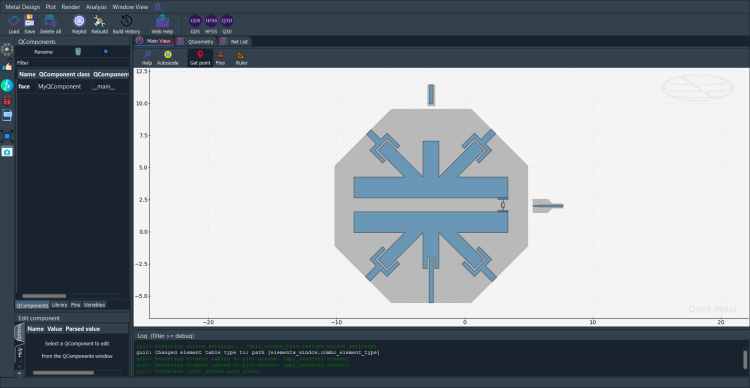

In [7]:
face = MyQComponent(design,'face')
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [8]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qb = EPRanalysis(design, "hfss")

In [9]:
hfss = eig_qb.sim.renderer

In [10]:
hfss.start()

INFO 04:08PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:08PM [load_ansys_project]: 	Opened Ansys App
INFO 04:08PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 04:08PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/simon/Documents/Ansoft/
	Project:   Project64
INFO 04:08PM [connect_design]: No active design found (or error getting active design).
INFO 04:08PM [connect]: 	 Connected to project "Project64". No design detected


True

In [11]:
hfss.activate_ansys_design("StarmonQubit", 'eigenmode')

04:08PM 27s WARNING [activate_ansys_design]: The design_name=StarmonQubit was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 04:08PM [connect_design]: 	Opened active design
	Design:    StarmonQubit [Solution type: Eigenmode]
WARNING 04:08PM [connect_setup]: 	No design setup detected.
WARNING 04:08PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [12]:
hfss.render_design([])
#hfss.save_screenshot()

In [16]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '25 nH')
pinfo.design.set_variable('Cj', '10 fF')

setup.analyze()


Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



INFO 06:43PM [analyze]: Analyzing setup Setup


In [17]:
eig_qb.sim.convergence_t, eig_qb.sim.convergence_f, _ = hfss.get_convergences()
eig_qb.sim.plot_convergences()

06:43PM 25s INFO [get_f_convergence]: Saved convergences to C:\Users\simon\Documents\Python Scripts\hfss_eig_f_convergence.csv


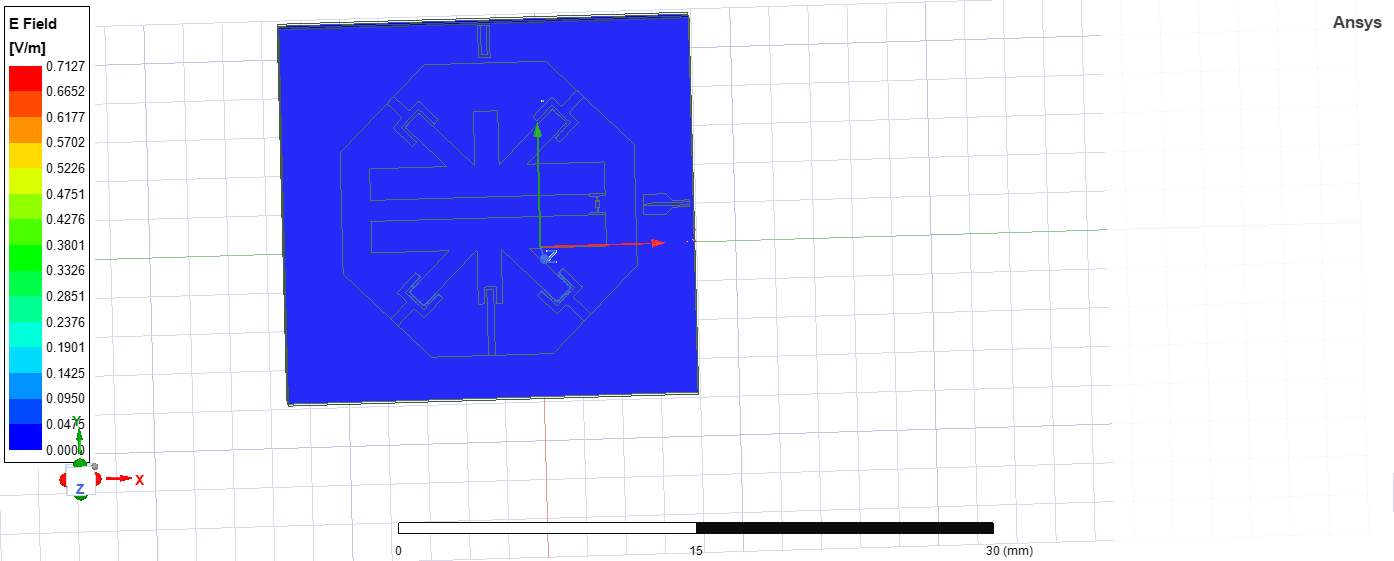

WindowsPath('C:/Users/simon/Documents/Python Scripts/ansys.png')

In [18]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
#hfss.save_screenshot()